### Curvas de rotacion

- La curva de rotacion de la galaxia ha sido la manera en que comparamos los modelos de cinematica galactica con las observaciones (ver imagen).
- La curva de rotacion esperada muestra altas velocidades cerca del centro galactico con una gran disminucion conforme me alejo del mismo.
- El problema es que aun anadiendo todas las componentes visibles de la galaxia, la curva de rotacion no se ajusta a las observaciones. 
- Este es un indicio de la excistencia de materia oscura que motivo a la busqueda de MACHOS que pudieran explicar la componente que debia anadirse para poder ajustar las observaciones al modelo teorico.

    <img src="rotation_curve.png">
    
- Actualmente se puede usar datos de GAIA para poder 

# Problema
Usando los datos observacionales, proporcionados en tablas, hacer lo siguiente:

- Leer los datos usando el modulo "pandas".
- Usando las referencias calcular las velocidades de rotacion para cada uno de los archivos de datos.
- Construir la curva de rotacion de la Via Lactea.
- Usando los datos de las referencias hacer un ajuste de curva y graficarlo.

Tablas y referencias
- Burton_78.dat https://ui.adsabs.harvard.edu/abs/1978A&A....63....7B/abstract
- Burton_78_HI.dat https://ui.adsabs.harvard.edu/abs/1993A&A...274..765B/abstract
- clemens.dat https://ui.adsabs.harvard.edu/abs/1985ApJ...295..422C/abstract
- Brand93.dat https://ui.adsabs.harvard.edu/abs/1993A&A...275...67B/abstract

# Importante! Para poder calcular las velocidades de rotacion y distancias con respecto al centro galactico deben ir a las referencias. La excepcion es el archivo Burton_78_HI.dat, la velocidad y distancia estan explicitamente en km/s y kpc respectivamente. 
# Los datos pueden ser extraidos directamente de las figuras en las referencias. Si ese es el caso deberan sustentar como extrajeron esos datos. Esto no lo recomiendo ya que podria tomarles mas tiempo que aplicar las formulas de las referencias.

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
import numpy as np

/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Leer las tablas:

In [2]:
burton_78 = pd.read_csv('Burton78.dat', delim_whitespace = True)
burton_78

,l,VT(km/s)
0,10.158,67.732
1,10.166,57.299
2,10.257,58.686
3,10.545,139.087
4,10.732,155.207
...,...,...
279,80.894,8.119
280,81.128,9.402
281,81.279,7.291
282,81.529,19.064


In [3]:
burton_H1 = pd.read_csv('Burton78_HI.dat')
burton_H1

,R,V_R
0,0.109,193.248
1,0.174,207.006
2,0.275,229.172
3,0.362,264.331
4,0.449,258.217
5,0.535,268.153
6,0.608,250.955
7,0.709,255.159
8,0.796,250.191
9,0.868,220.764


In [4]:
clemens = pd.read_csv('clemens.dat', delim_whitespace=True)
clemens

,l[deg],Vt[km/s],err_Vt[km/s]
0,13.44,156.32,4.88
1,14.92,140.99,0.67
2,17.01,130.56,1.49
3,17.61,134.37,1.59
4,17.91,129.53,0.45
...,...,...,...
138,77.82,2.61,0.32
139,79.27,11.25,0.13
140,80.93,8.36,0.46
141,82.98,8.68,0.21


In [5]:
Brand93 = pd.read_csv('Brand93.dat', delim_whitespace= True)
Brand93

,#ID,Long(deg),Lat(deg),Dist(kpc),DeltaDist(kpc),Vlsr(km/s),DelaVlsr(km/s)
0,S8,351.36,0.61,1.70,0.30,-4.3,1.5
1,S11,352.80,0.64,1.74,0.30,-3.9,1.0
2,S27,4.24,22.51,0.17,0.05,3.0,1.5
3,S25,5.95,-1.30,1.80,0.20,12.0,1.5
4,S45,15.00,-0.68,2.20,0.20,20.0,2.0
...,...,...,...,...,...,...,...
201,BBW386B,299.34,-0.29,5.37,0.60,-40.4,0.5
202,BBW387,299.57,-0.85,2.27,0.33,-35.3,1.6
203,BBW396,300.53,-0.05,2.14,0.22,-22.8,0.5
204,BBW399,303.66,-3.51,1.28,0.26,-23.3,0.5


### Calculos con las tablas:

#### burton_78:

Constantes:

In [6]:
R_0 = 8.5*u.kpc
theta_0 = 220*u.km/u.s

In [7]:
R_burton_78 = R_0*np.sin((burton_78['l']).values*u.degree)
R_burton_78

<Quantity [1.49908754, 1.50025574, 1.51354202, 1.55556558, 1.58283074,
           1.62143958, 1.65943174, 1.70611043, 1.74387954, 1.7541872 ,
           1.7794368 , 1.8216278 , 1.83524652, 1.87361301, 1.88316223,
           1.9188772 , 1.94083796, 1.97072305, 1.97894778, 2.05302518,
           2.061086  , 2.09704766, 2.10366027, 2.11601935, 2.1578035 ,
           2.23003962, 2.250504  , 2.28453245, 2.3088144 , 2.33421723,
           2.34391575, 2.35247053, 2.39349737, 2.46174056, 2.4658581 ,
           2.48714561, 2.50969175, 2.55642375, 2.59177041, 2.6163426 ,
           2.64991372, 2.67062602, 2.68484674, 2.68766173, 2.75680666,
           2.78121195, 2.81399239, 2.83987535, 2.86097951, 2.89796848,
           2.92222191, 2.93740144, 2.97370544, 3.00259322, 3.01466437,
           3.05595869, 3.06066489, 3.11346595, 3.13802247, 3.17383703,
           3.19419464, 3.2124708 , 3.24252687, 3.27869583, 3.30194964,
           3.33445611, 3.38705411, 3.41886525, 3.43420666, 3.45739699,
      

In [8]:
theta_burton_78 = theta_0*np.sin((burton_78['l']).values*u.degree) + burton_78['VT(km/s)'].values*u.km/u.s
theta_burton_78

<Quantity [106.53191274,  96.12914866,  97.86002883, 179.34869748,
           196.1743838 , 197.86667139, 198.50399799, 198.9871524 ,
           198.91070563, 174.08849214, 170.59701135, 185.90501367,
           167.42849817, 174.91851308, 158.40966948, 108.65705697,
           195.86345314, 113.19394964, 181.77382495, 218.95812238,
           153.21875525, 183.4295276 , 111.04167768, 106.91555969,
           129.95303175, 197.9376724 , 195.28733876, 199.0020753 ,
           195.95154906, 194.86203418, 137.60405469, 136.43947242,
           138.64634381, 202.29263796, 176.95920956, 151.42718037,
           138.57772764, 199.73926183, 194.97411651, 194.57010263,
           200.68200218, 202.95108518, 171.83515083, 126.19400954,
           199.59164289, 204.76030942, 203.7257442 , 199.03065611,
           195.71788139, 197.95624306, 201.86997898, 197.68286086,
           195.94049381, 194.95517745, 192.94560729, 198.0704014 ,
           161.44420891, 201.56282469, 202.89140498, 210.57737

#### burton_H1

Los datos ya vienen dados.

In [9]:
R_burton_H1 = burton_H1['R'].values*u.kpc
R_burton_H1

<Quantity [0.109, 0.174, 0.275, 0.362, 0.449, 0.535, 0.608, 0.709, 0.796,
           0.868, 0.941, 1.056, 1.114, 1.302, 1.375, 1.476, 1.548, 1.635,
           1.737, 1.838, 1.91 , 2.026, 2.084, 2.142, 2.25 ] kpc>

In [10]:
V_R_burton_H1 = burton_H1['V_R'].values*u.km/u.s
V_R_burton_H1

<Quantity [193.248, 207.006, 229.172, 264.331, 258.217, 268.153, 250.955,
           255.159, 250.191, 220.764, 222.293, 220.382, 217.707, 223.822,
           221.146, 224.204, 223.822, 222.675, 224.968, 221.146, 205.096,
           213.503, 207.771, 208.917, 211.21 ] km / s>

#### clemens:

In [11]:
R_clemens = R_0*np.sin((clemens['l[deg]']).values*u.degree)
R_clemens

<Quantity [1.97562927, 2.1884959 , 2.48657816, 2.57155812, 2.61394293,
           2.65625608, 2.6984964 , 2.74066275, 2.78415569, 2.82616805,
           2.86810292, 2.91135301, 2.95312679, 2.99620797, 3.03920144,
           3.08072333, 3.12354053, 3.1662663 , 3.20889938, 3.25143852,
           3.29388248, 3.33623002, 3.3784799 , 3.42063087, 3.46403651,
           3.50598269, 3.54917431, 3.59091064, 3.63388302, 3.67674205,
           3.71815238, 3.76078435, 3.80329901, 3.84569503, 3.88929027,
           3.93144125, 3.9734696 , 4.0166815 , 4.05845672, 4.10140481,
           4.14421684, 4.1868914 , 4.22814016, 4.27182243, 4.31407609,
           4.35618663, 4.39815267, 4.4412378 , 4.48416653, 4.52568167,
           4.5682978 , 4.61075306, 4.6542874 , 4.69641161, 4.73837044,
           4.78138905, 4.82422924, 4.86567307, 4.90815684, 4.95166335,
           4.99377394, 5.03569819, 5.07862421, 5.12134975, 5.1638731 ,
           5.20619259, 5.24830654, 5.29137441, 5.33422162, 5.3756973 ,
      

In [12]:
theta_clemens = theta_0*np.sin((clemens['l[deg]']).values*u.degree) + clemens['Vt[km/s]'].values*u.km/u.s
theta_clemens

<Quantity [207.45393398, 197.6334234 , 194.91849353, 200.92797485,
           197.18499349, 196.44015733, 197.41343636, 194.54480059,
           196.91050026, 196.70787886, 197.25325208, 196.11266603,
           196.52386993, 200.0589122 , 197.44168433, 200.23636842,
           201.25457845, 193.77042186, 198.81386628, 201.52487941,
           199.38342902, 198.99948295, 196.12300911, 199.8739755 ,
           204.96741552, 209.81308146, 205.72098222, 202.36121645,
           203.36344279, 206.50273535, 206.53453217, 208.11794781,
           205.86832721, 205.33563605, 204.67398357, 207.02495006,
           206.73274254, 210.22116827, 211.38240917, 211.79400673,
           207.51208287, 210.82660083, 216.98421584, 220.04481578,
           221.70843985, 222.1183599 , 223.94453978, 224.87968424,
           222.76078089, 216.63529021, 217.15829594, 218.78713807,
           218.23390917, 229.29418284, 225.52017613, 231.30359902,
           222.95240397, 211.75506763, 210.63464764, 212.68069

#### Brand93:

Usando las ecuaciones del paper 
$$ 1)  V_{lsr} = \left(\dfrac{\Theta R_0}{R} - \Theta_0 \right)sin(l)cos(b) $$


$$ 2) R = \sqrt{d^2 + cos^2(b) + R_0^2 - 2R_0 d cos(b)cos(l)} $$

Despejando 1) Nos queda:

$$ \Theta = \dfrac{R}{R_0} \left( \dfrac{V_{lsr}}{sin(l)cos(b)} + \Theta_0 \right) $$

In [13]:
R_Brand93 = (np.sqrt(Brand93['Dist(kpc)']**2 + np.cos(Brand93['Lat(deg)'])**2 + R_0**2 - 2*R_0*Brand93['Dist(kpc)']*np.cos(Brand93['Lat(deg)'])*np.cos(Brand93['Long(deg)']))).values*u.kpc
R_Brand93

<Quantity [ 7.4165623 ,  7.87138887,  8.47886042,  8.23566925,  9.98935786,
            6.71439303, 10.55143951,  9.15875711,  9.66153025, 10.76181422,
            8.88972591,  9.13297786,  9.63978132, 10.41117095,  5.48469963,
            8.40785423, 10.76477037, 12.07906514,  6.95432439,  6.37480386,
            7.73520114,  9.32506666,  8.75547671,  9.35670494,  7.81753399,
            8.60072175,  8.98414423,  8.15950612,  2.79961382,  8.50324106,
           11.31445763,  8.04004959,  8.78266472,  8.58461228,  7.49909191,
            8.04784646,  7.21775148,  9.99013303,  9.93121811,  8.71280588,
           14.88560538,  7.97047702,  9.34440804,  8.95208944,  8.86753966,
            8.34948392,  7.04930183,  6.94458834,  8.67768364,  9.06043631,
            8.48767784,  7.02529537,  9.03066787,  8.13570192, 10.51485935,
            8.89906635,  8.74534471,  8.47747237,  6.60706906, 13.22319306,
            6.88631239,  6.97809997,  9.91798323,  7.6337616 ,  7.17454412,
            

In [14]:
theta_Brand93 = theta_0*np.absolute(np.sin((Brand93['Long(deg)']).values*u.degree)) + np.absolute(Brand93['Vlsr(km/s)'].values)*u.km/u.s
theta_Brand93

<Quantity [ 37.34962961,  31.47331138,  19.26557594,  34.80531869,
            76.94018992,  76.4963795 , 107.37784311,  88.74205653,
            98.861832  , 159.22599075, 171.42815972, 189.10105646,
           200.98544968, 216.66948497, 218.43018905, 219.26975108,
           223.25512577, 229.82865735, 222.44059933, 212.29355821,
           222.70490499, 219.03803284, 223.21043452, 280.89822743,
           227.35160549, 262.70056145, 313.38402071, 218.68856992,
           290.58767884, 231.15527588, 262.89591201, 229.82260551,
           233.60569303, 222.65388465, 258.21929399, 219.09918823,
           251.07019984, 261.9253284 , 258.72462849, 219.30065569,
           257.58753673, 216.44193543, 247.99995327, 260.73552453,
           260.53668881, 256.03829445, 248.4060336 , 246.62258234,
           232.95194766, 238.68683837, 238.71812858, 226.16703845,
           239.43068218, 223.50458262, 214.82382944, 205.0262417 ,
            51.66408593, 152.94268597, 130.33110294, 135.95019

### Grafica:

Segun la ecuación de curva de rotación es la siguiente:

$$ \Theta(R) = \Theta_0 sin(l) + V_{r,max} $$

$$ \Theta(R) = \Theta_0 \dfrac{R}{R_0} + V_{r,max} $$

<IPython.core.display.Javascript object>


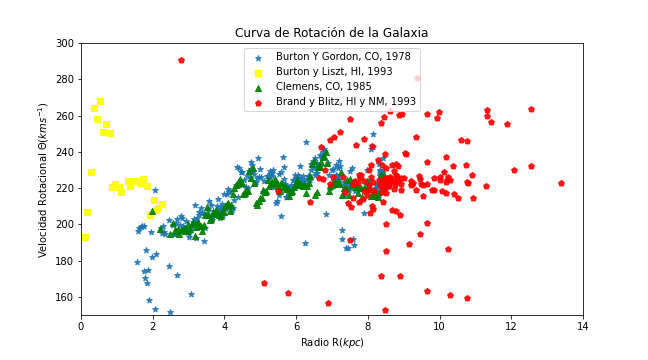

Text(0.5, 1.0, 'Curva de Rotación de la Galaxia')

In [15]:
fig,ax = plt.subplots(figsize=(9,5))
ax.scatter(R_burton_78, theta_burton_78, marker = '*', label = 'Burton Y Gordon, CO, 1978', alpha = 0.9)
ax.scatter(R_burton_H1, V_R_burton_H1, marker = 's', color = 'yellow', label = 'Burton y Liszt, HI, 1993', alpha = 0.9)
ax.scatter(R_clemens, theta_clemens, marker = '^', color = 'green', label = 'Clemens, CO, 1985', alpha = 0.9)
ax.scatter(R_Brand93, theta_Brand93, marker = 'p', color = 'red', label = 'Brand y Blitz, HI y NM, 1993', alpha = 0.9)
ax.set_ylim(150,300)
ax.set_xlim(0,14)
ax.set_xlabel(r'Radio R($kpc$)')
ax.set_ylabel(r'Velocidad Rotacional $\Theta(km s^{-1})$')
ax.legend()
##ax.scatter(burton_78['l'].values, burton_78['VT(km/s)'].values, marker = 'o', color = 'yellow')
ax.set_title(r'Curva de Rotación de la Galaxia')

### Ajuste de Modelo:

Vamos a unir todos los datos obtenidos en un solo dataframe:

In [16]:
Data_Burton_78 = {'Radio': R_burton_78, 'Velocidad Rotacional': theta_burton_78}
df_Burton_78 = pd.DataFrame(Data_Burton_78)

In [17]:
Data_Burton_78_HI  = {'Radio': R_burton_H1, 'Velocidad Rotacional': V_R_burton_H1}
df_Burton_78_HI = pd.DataFrame(Data_Burton_78_HI)

In [18]:
Data_clemens = {'Radio': R_clemens, 'Velocidad Rotacional': theta_clemens}
df_clemens = pd.DataFrame(Data_clemens)

In [19]:
Data_Brand93 = {'Radio': R_Brand93, 'Velocidad Rotacional': theta_Brand93}
df_Brand93 = pd.DataFrame(Data_Brand93)

In [20]:
df_new = pd.concat([df_Burton_78_HI, df_Burton_78, df_clemens, df_Brand93])
df_new.reset_index(inplace = True, drop = True)
df_new

,Radio,Velocidad Rotacional
0,0.109000,193.248000
1,0.174000,207.006000
2,0.275000,229.172000
3,0.362000,264.331000
4,0.449000,258.217000
...,...,...
653,12.536082,232.180029
654,9.432105,226.645756
655,7.756029,212.299925
656,8.067975,206.415080


Miremos como nos quedan los datos en un solo dataframe:

<IPython.core.display.Javascript object>


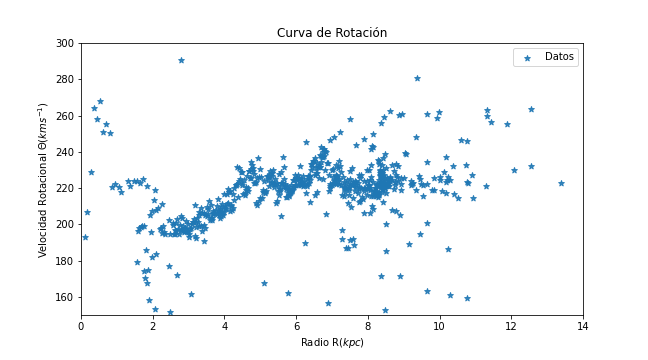

Text(0.5, 1.0, 'Curva de Rotación')

In [21]:
fig,ax = plt.subplots(figsize=(9,5))
ax.scatter(df_new['Radio'], df_new['Velocidad Rotacional'], marker = '*', label = 'Datos', alpha = 0.9)
##ax.plot(np.array(df_new['Radio']), np.array(df_new['Velocidad Rotacional']), marker = '*', label = 'Grafico', alpha = 0.9)
ax.set_ylim(150,300)
ax.set_xlim(0,14)
ax.set_xlabel(r'Radio R($kpc$)')
ax.set_ylabel(r'Velocidad Rotacional $\Theta(km s^{-1})$')
ax.legend()
ax.set_title('Curva de Rotación')

In [22]:
#pip install -U scikit-learn

Datos:

In [23]:
x_sk = df_new['Radio'].values.reshape(-1, 1) 
y_sk = df_new['Velocidad Rotacional'].values.reshape(-1, 1) 

Importamos librerias:

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Se define el grado del polinomio:

In [25]:
polynomial_regression = PolynomialFeatures(degree=7)

In [26]:
x_polynomial = polynomial_regression.fit_transform(x_sk,y_sk)

Se define el algoritmo a utilizar:

In [27]:
lineal_regression = LinearRegression()

Se entrena al modelo:

In [28]:
lineal_regression.fit(x_polynomial, y_sk)

LinearRegression()

Se realiza una predicción:

In [29]:
y_head2 = 1.03*lineal_regression.predict(x_polynomial)

Vamos a realizar otro ajuste usando Numpy:

In [30]:
x = df_new['Radio'].values
y = df_new['Velocidad Rotacional'].values

In [31]:
p = np.polyfit(x,y,9)

In [32]:
poly = 1.04*np.polyval(p,x)

<IPython.core.display.Javascript object>


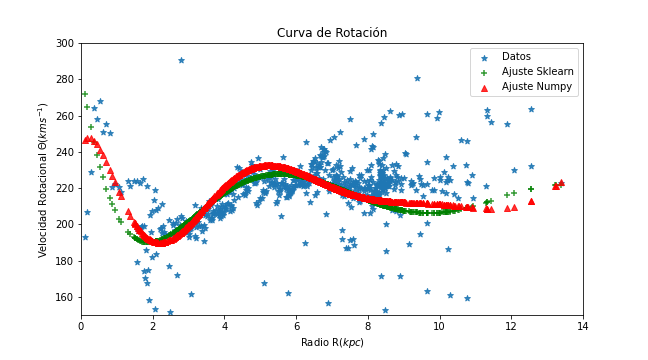

Text(0.5, 1.0, 'Curva de Rotación')

In [38]:
fig,ax = plt.subplots(figsize=(9,5))
ax.scatter(df_new['Radio'], df_new['Velocidad Rotacional'], marker = '*', label = 'Datos', alpha = 0.9)
ax.scatter(x_sk, y_head2, color = 'green', marker = '+', label = 'Ajuste Sklearn', alpha = 0.8)
ax.scatter(x, poly, color = 'red', marker = '^', label = 'Ajuste Numpy', alpha = 0.8)
ax.set_ylim(150,300)
ax.set_xlim(0,14)
ax.set_xlabel(r'Radio R($kpc$)')
ax.set_ylabel(r'Velocidad Rotacional $\Theta(km s^{-1})$')
ax.legend()
ax.set_title('Curva de Rotación')

Referencias:

https://www.youtube.com/watch?v=8dpanILWkds&t=648s

https://scikit-learn.org/stable/index.html